In [ ]:
import torch
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [ ]:
def target_function(x):     #  target
    return 2**x * torch.sin(2**-x)

In [ ]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh() #  relu, sigmoid, tanh, softmax
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x): # function shows the architecture
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

net = RegressionNet(5) # net - our created network, in brackets is the number of neurons

In [ ]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

In [ ]:
# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)

In [ ]:
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise

In [ ]:
x_train.unsqueeze_(1) # resizes the tensor
y_train.unsqueeze_(1)

tensor([[-0.0293],
        [-0.0210],
        [ 0.0494],
        [ 0.0667],
        [ 0.0598],
        [-0.0262],
        [-0.0986],
        [-0.0198],
        [-0.0077],
        [-0.0394],
        [-0.0086],
        [ 0.0448],
        [ 0.0189],
        [-0.0521],
        [ 0.0546],
        [-0.0093],
        [-0.0068],
        [ 0.0255],
        [ 0.0704],
        [ 0.0789],
        [-0.1010],
        [-0.0859],
        [-0.1119],
        [-0.0070],
        [-0.0019],
        [ 0.0097],
        [-0.1272],
        [ 0.0329],
        [-0.0533],
        [-0.0522],
        [-0.0870],
        [ 0.0570],
        [-0.0306],
        [-0.0623],
        [-0.0315],
        [ 0.0929],
        [-0.0227],
        [-0.0057],
        [ 0.0097],
        [-0.0776],
        [-0.0409],
        [ 0.1299],
        [-0.0958],
        [-0.1162],
        [-0.0470],
        [ 0.0015],
        [ 0.1453],
        [ 0.1317],
        [ 0.0665],
        [-0.0397],
        [-0.1484],
        [-0.1784],
        [-0.

In [ ]:
x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

tensor([[-1.5482e-04],
        [-1.0732e-03],
        [ 7.0097e-04],
        [-5.7608e-04],
        [ 6.5311e-04],
        [ 9.8906e-04],
        [-1.7836e-03],
        [ 1.5283e-03],
        [ 1.8686e-03],
        [ 2.1850e-03],
        [ 3.2003e-04],
        [ 2.6802e-03],
        [ 3.3656e-03],
        [-2.4106e-03],
        [ 1.0479e-03],
        [-4.6642e-03],
        [ 3.9665e-03],
        [ 4.9868e-03],
        [-4.1531e-03],
        [ 6.0007e-03],
        [-2.5418e-03],
        [-2.2237e-03],
        [ 8.5996e-03],
        [-3.8417e-03],
        [ 7.4946e-03],
        [-1.2848e-02],
        [-1.0455e-02],
        [-6.5003e-03],
        [-1.1817e-02],
        [-2.0529e-02],
        [-2.9806e-03],
        [ 2.4776e-02],
        [-2.3459e-02],
        [ 1.7232e-02],
        [-1.7709e-02],
        [ 2.7786e-02],
        [-4.1880e-02],
        [ 3.9170e-02],
        [ 4.1222e-03],
        [-5.7028e-02],
        [ 2.3339e-02],
        [ 6.8612e-02],
        [-1.0514e-02],
        [-8

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.1) 
# optimizer is object that performs gradient descent steps, in our case Adam,
# net.parameters() parameters that we want to optimize


In [ ]:
def loss(pred, target):    # loss function
    squares = (pred - target) ** 2
    return squares.mean()

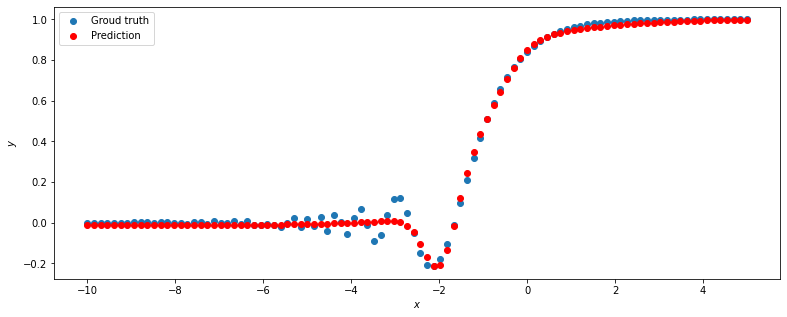

In [ ]:
for epoch_index in range(665):
    optimizer.zero_grad() # reset gradients from the previous step
    y_pred = net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(net, x_validation, y_validation)

In [ ]:
def metric(pred, target):
  return (pred - target).abs().mean()
print(metric(net.forward(x_validation), y_validation).item())

0.01838657446205616
